<a href="https://colab.research.google.com/github/benecaio/analiseSinaisPhyton/blob/main/9_Filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtros

***********

Vamos relembrar como é a filtragem de um sinal simples. Primeiro, devemos criar o nosso sinal sintético

In [1]:
!pip install obspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 39.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
!git clone https://github.com/GuilhermeZakarewicz/AnaliseSinais

Cloning into 'AnaliseSinais'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 180 (delta 95), reused 128 (delta 49), pack-reused 0
Receiving objects: 100% (180/180), 25.39 MiB | 29.01 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [2]:
cd AnaliseSinais/Aulas

/content/AnaliseSinais/Aulas


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft, ifft
from obspy.io.segy.core import _read_segy

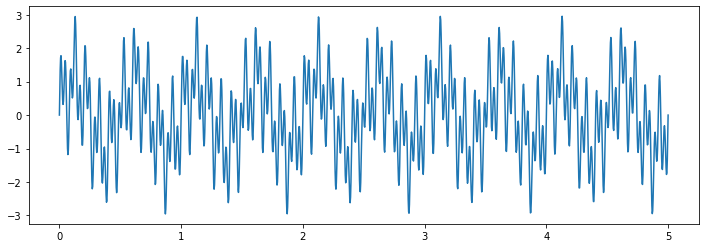

In [4]:
fs = 300
t = np.linspace(0,5,5*fs)

f1,f2,f3 = 2,10,25

g1 = np.sin(2*np.pi*f1*t)
g2 = np.sin(2*np.pi*f2*t)
g3 = np.sin(2*np.pi*f3*t)

g = g1+g2+g3

plt.figure(figsize=(12,4))
plt.plot(t,g)
plt.show()

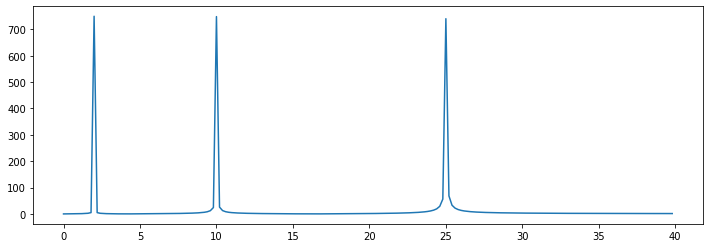

In [5]:
gf = rfft(g)
xf = rfftfreq(len(t),1/fs)

plt.figure(figsize=(12,4))
plt.plot(xf[:200], np.abs(gf[:200]))
plt.show()

Filtro Passa-Baixa

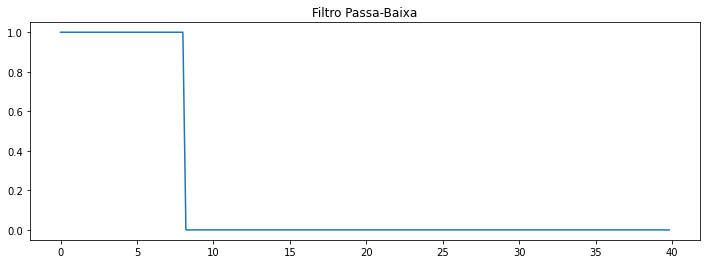

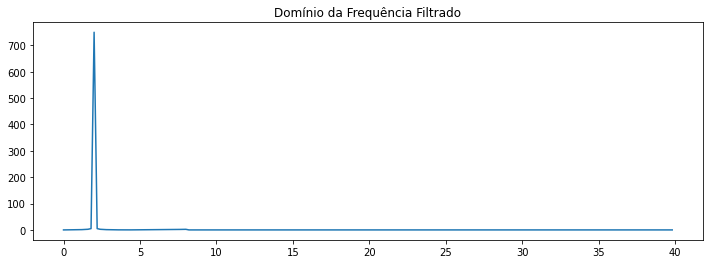

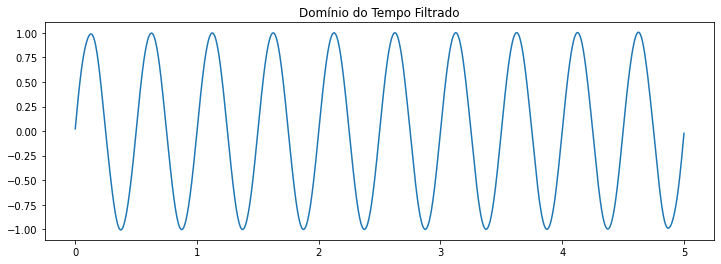

In [6]:
filter_LP = np.ones(len(xf))
filter_LP[abs(xf)>8] = 0 
f1 = gf*filter_LP

plt.figure(figsize=(12,4))
plt.title("Filtro Passa-Baixa")
plt.plot(xf[:200],filter_LP[:200])
plt.show()

plt.figure(figsize=(12,4))
plt.title("Domínio da Frequência Filtrado")
plt.plot(xf[:200],abs(f1[:200]))
plt.show()

g1 = irfft(f1)

plt.figure(figsize=(12,4))
plt.title("Domínio do Tempo Filtrado")
plt.plot(t,g1)
plt.show()

Filtro Passa-Alta

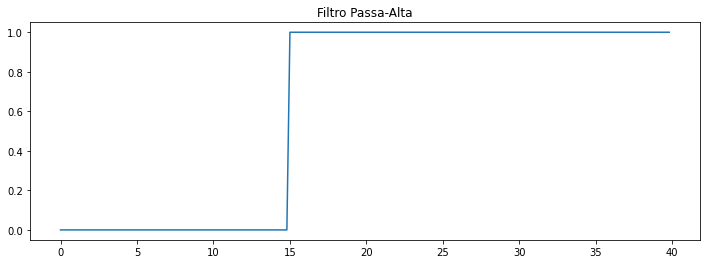

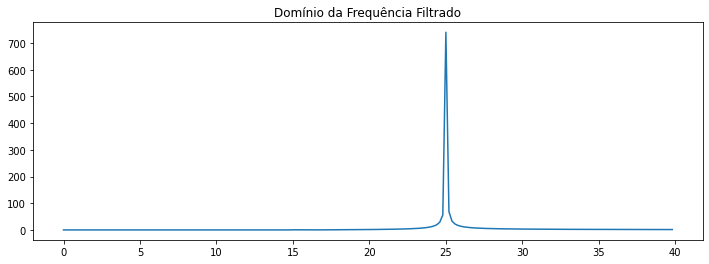

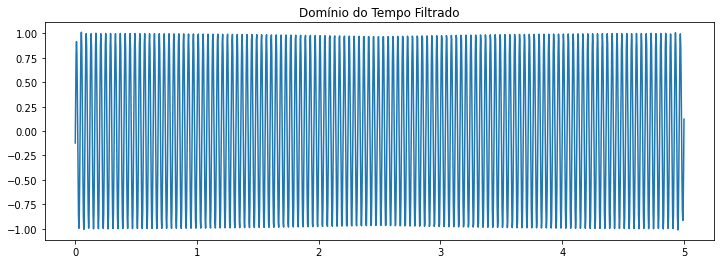

In [7]:
filter_HP = np.ones(len(xf))
filter_HP[abs(xf)<15] = 0 
f1 = gf*filter_HP

plt.figure(figsize=(12,4))
plt.title("Filtro Passa-Alta")
plt.plot(xf[:200],filter_HP[:200])
plt.show()

plt.figure(figsize=(12,4))
plt.title("Domínio da Frequência Filtrado")
plt.plot(xf[:200],abs(f1[:200]))
plt.show()

g1 = irfft(f1)

plt.figure(figsize=(12,4))
plt.title("Domínio do Tempo Filtrado")
plt.plot(t,g1)
plt.show()

Existe também um terceiro tipo de filtro, chamado de passa-banda. Nele, escolhemos duas frequências a serem utilizadas como limite.

Filtro Passa-Banda

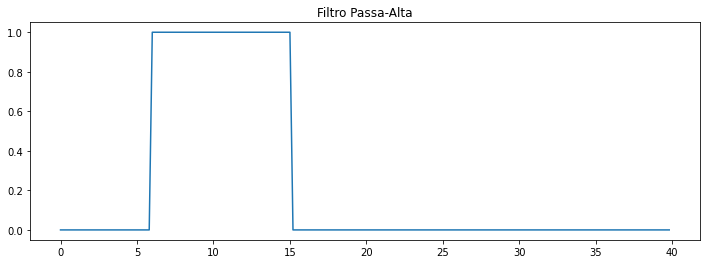

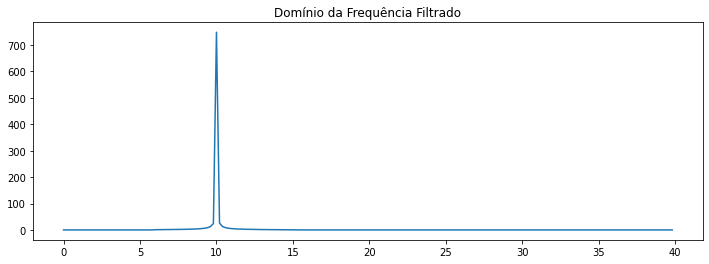

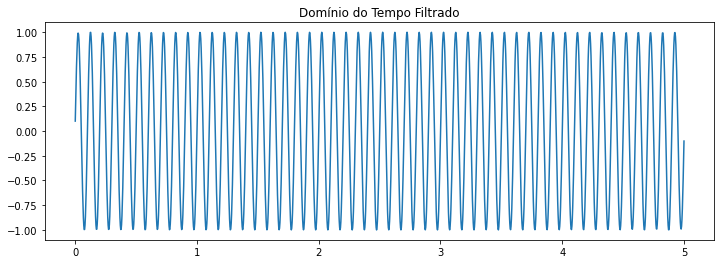

In [8]:
filter_BP = np.ones(len(xf))
filter_BP[abs(xf)<6] = 0
filter_BP[abs(xf)>15] = 0
f1 = gf*filter_BP

plt.figure(figsize=(12,4))
plt.title("Filtro Passa-Alta")
plt.plot(xf[:200],filter_BP[:200])
plt.show()

plt.figure(figsize=(12,4))
plt.title("Domínio da Frequência Filtrado")
plt.plot(xf[:200],abs(f1[:200]))
plt.show()

g1 = irfft(f1)

plt.figure(figsize=(12,4))
plt.title("Domínio do Tempo Filtrado")
plt.plot(t,g1)
plt.show()

A filtragem é uma multiplicação feita no domínio da frequência. Uma multiplicação no domínio da frequência é o conceito de Convolução apresentado nas aulas passadas. Assim, dado um sinal $f(t)$, definimos que 

$ g(t) = f(t) * h(t) $

representa o sinal filtrado por $h(t)$.

Definimos os diferentes tipos de filtros que existem:

- Passa-baixa: elimina as frequências altas
- Passa-alta: elimina as frequências baixas
- Passa-banda: elimina um determinado intervalo de frequências

Vamos analisar a equação de um filtro passa-baixa com mais calma. 

$\hat{B}(\omega) =
  \begin{cases}
    1       & \quad \text{se } |\omega| \leq a\\
    0  & \quad \text{se } |\omega| > a
  \end{cases}
$

Se lembrarmos das aulas passadas, é possível perceber que essa é a equação de uma função caixa no domínio da frequência. Para passar para o domínio do tempo, basta aplicar a transformada de Fourier inversa. Como já resolvemos essa conta, sabemos que 

$ B(t) = F^{-1}[\hat{B}(\omega)] = \dfrac{a}{\pi} sinc \Big( \dfrac{at}{\pi} \Big) $

Assim, no domínio do tempo, a filtragem consiste na convolução do nosso sinal $f(t)$ com uma função $sinc$. No domínio da frequência, é a multiplicação da transformada do nosso sinal $\hat{f}(\omega)$ com a função caixa $\hat{B}(\omega)$.

**********

A equação de um filtro passa-alta pode ser escrita como:

$\hat{A}(\omega) =
  \begin{cases}
    1       & \quad \text{se } |\omega| > 0\\
    0  & \quad \text{se } |\omega| \leq a,
  \end{cases}
$

ou então 

$\hat{A}(\omega) = 1 - \hat{B}(\omega)$

********************

Já o filtro passa-banda necessita de um intervalo específico $(a,b)$. 

$\hat{D}(\omega) =
  \begin{cases}
    1       & \quad \text{se } a \leq |\omega| \leq b\\
    0  & \quad \text{caso contrário}.
  \end{cases}
$

Assim, no domínio do tempo, o filtro passa-banda será

$ D(t) = F^{-1}[\hat{D}(\omega)] = B_{b}(t) - B_{a}(t) = \dfrac{b}{\pi} sinc \Big( \dfrac{bt}{\pi} \Big) - \dfrac{a}{\pi} sinc \Big( \dfrac{at}{\pi} \Big). $

Assim, todos os filtros podem ser compreendidos a partir do passa-baixa. 

Existem diferentes tipos de filtros passa-baixa:

- Retangular (ou caixa), que estamos acostumados a trabalhar;
- Triangular: $ T(x,a) = max\Big[0,1-\dfrac{|x|}{a}\Big] $;
- Hamn: $H(x,a) = 0.5 + 0.5 cos\Big(\dfrac{\pi x}{a}\Big) = cos^2\Big( \dfrac{\pi x}{2a} \Big) $

************

**Exemplo**

Vamos considerar o caso em que $f(t) = \mu(t)$ (função degrau ou step).

Queremos calcular $ \mu_{B}(t) = \mu(t) * B(t) $

$ = \displaystyle \int_{-\infty}^{\infty} B(x) \mu(t - x) dx = \displaystyle \int_{-\infty}^{t} B(x)dx $

$ = \displaystyle \int_{-\infty}^{t} sinc \Big( \dfrac{ax}{\pi} \Big) dx = \displaystyle \int_{-\infty}^{at/\pi} sinc(x) dx $

Vamos compreender melhor as propriedades da nova função $\mu_{B} (t)$.

$ \displaystyle \lim_{t \to -\infty} \mu_{B} (t) = 0 $ 

$ \displaystyle \lim_{t \to \infty} \mu_{B} (t) = 1 $ 

$ \mu_{B} (0) = 1/2 $

Qual o valor de $\mu_{B} (\pi/a)$?

$ \mu_{B} (\pi/a) = \displaystyle \int_{-\infty}^{0} sinc(x) dx + \displaystyle \int_{0}^{1} sinc(x) dx $

$ \mu_{B} (\pi/a) = 1/2 + \displaystyle \int_{0}^{1} sinc(x) dx = 1/2 + 0.59 $.

Assim, a soma deste termo adicional de $0.59$ é o resultado de algo chamado **Fenômeno de Gibbs**. Já havíamos nos deparado com este fenômeno anteriormente nos estudos sobre séries de Fourier. É um comportamento oscilatório causado por uma descontinuidade. Assim, para amenizar o fenômeno de Gibbs, é comum que os filtros sejam mais suaves que uma função caixa, como adicionar mais frequências. 

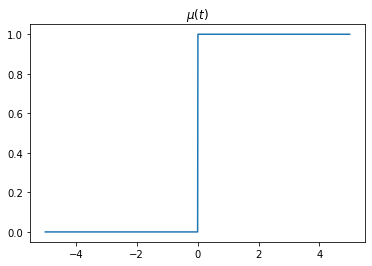

In [9]:
t = np.arange(-5,5,1/100)
f = t.copy()

for count,i in enumerate(t):
    if (i >= -5) and (i <= 0):
        f[count]=0
    elif (i > 0) and (i <= 5):
        f[count]=1
        
plt.plot(t,f)
plt.title("$\mu(t)$")
plt.show()

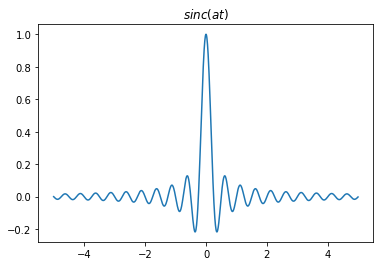

In [10]:
a = 4
B = np.sinc(a*t)

plt.plot(t,B)
plt.title("$sinc(at)$")
plt.show()

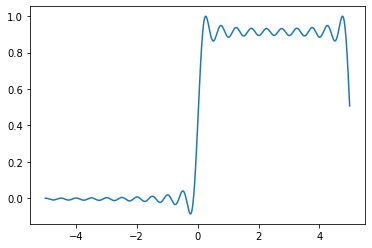

In [11]:
f_b = np.convolve(f,B,"same")
fb = f_b/(max(f_b))

plt.plot(t,fb)
plt.show()

Assim, uma das formas de amenizar o fenômeno de Gibbs é aplicar "degrais" ao nosso filtro, suavizando a função caixa e minimizando o efeito das descontinuidades.

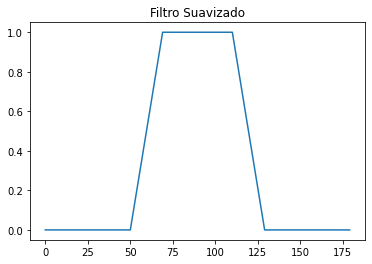

In [12]:
s1 = np.zeros(50)
s2 = np.linspace(0,1,20)
s3 = np.ones(40)
s4 = np.linspace(1,0,20)
s5 = np.zeros(50)

s = np.concatenate((s1,s2,s3,s4,s5),axis=0)

plt.plot(s)
plt.title("Filtro Suavizado")
plt.show()

## Dado de Sísmica

Vamos trabalhar com um dado mais realista para estudar as aplicações dos filtros em sinais geofísicos.

In [13]:
dado = _read_segy("../Dados/SYNTHETIC_time.segy")

In [14]:
ntr = len(dado)
nz = len(dado[0])
dx = 1
dt = (4/nz)
M = np.zeros([ntr,nz])

for i in range(len(dado)):
    M[i] = dado[i]

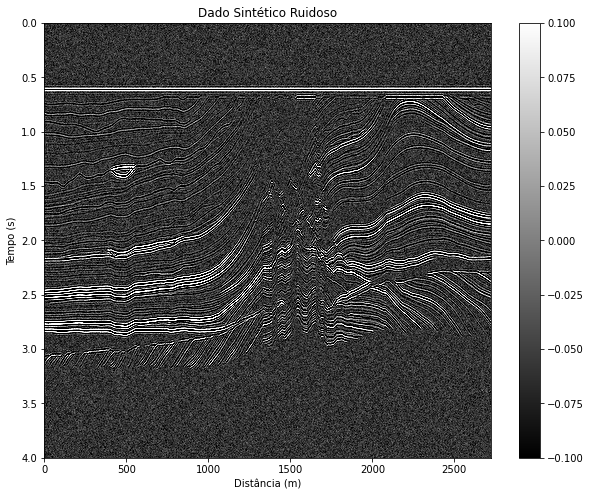

In [15]:
M_noise = M.copy()

nn = np.random.rand(ntr,nz)
M_noise = M_noise+(nn-0.8)*0.2 #adicionando ruído branco ao sinaç
    
plt.figure(figsize=(10,8))
plt.imshow(M_noise.T, aspect="auto", interpolation="sinc", clim=(-0.1,0.1), cmap="gray", extent=[0,ntr*dx,nz*dt,0])
plt.title("Dado Sintético Ruidoso")
plt.xlabel("Distância (m)")
plt.ylabel("Tempo (s)")
plt.colorbar()
plt.show()

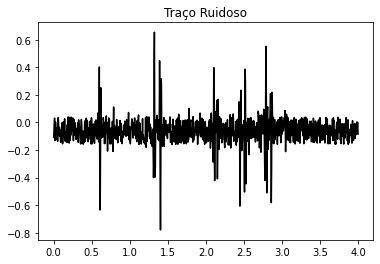

In [16]:
tr_noise = M_noise[500,:]
t = np.linspace(0,4,len(tr_noise))

plt.plot(t,tr_noise,"k")
plt.title("Traço Ruidoso")
plt.show()

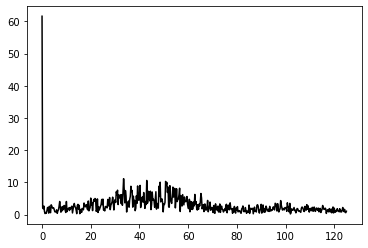

In [17]:
x_f = rfftfreq(len(t),dt)
tr_noise_f = rfft(tr_noise)

plt.plot(x_f,abs(tr_noise_f),'k')
plt.show()

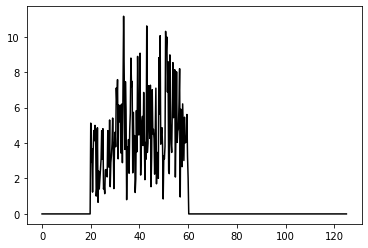

In [22]:
n = len(x_f)
Filter_BP = np.ones(n)
Filter_BP[abs(x_f)<20] = 0
Filter_BP[abs(x_f)>60] = 0

tr_f_filtered = tr_noise_f*Filter_BP

plt.plot(x_f,abs(tr_f_filtered),"k")
plt.show()

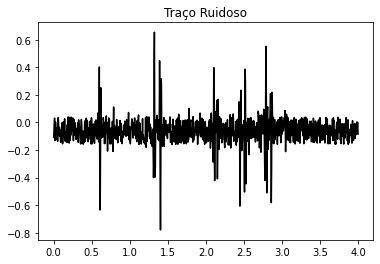

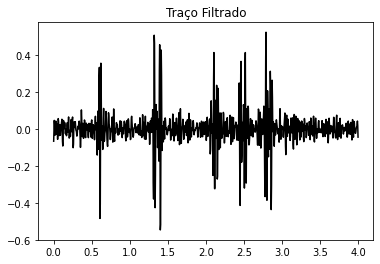

In [23]:
tr_new = irfft(tr_f_filtered)

plt.plot(t,tr_noise,"k")
plt.title("Traço Ruidoso")
plt.show()

plt.plot(t[:-1],tr_new,"k")
plt.title("Traço Filtrado")
plt.show()

In [24]:
M_filtered = M_noise.copy()

for i in range(ntr):
    trace = M_filtered[i,:]
    tr_f = rfft(trace)
    tr_f_filtered = tr_f*Filter_BP
    tr_new = irfft(tr_f_filtered)
    M_filtered[i,:-1] = tr_new

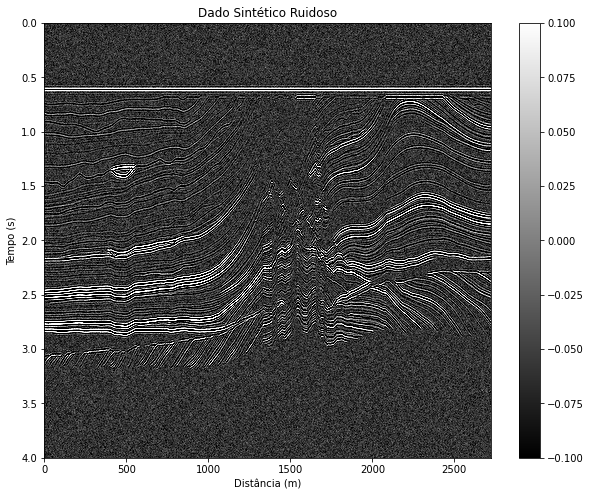

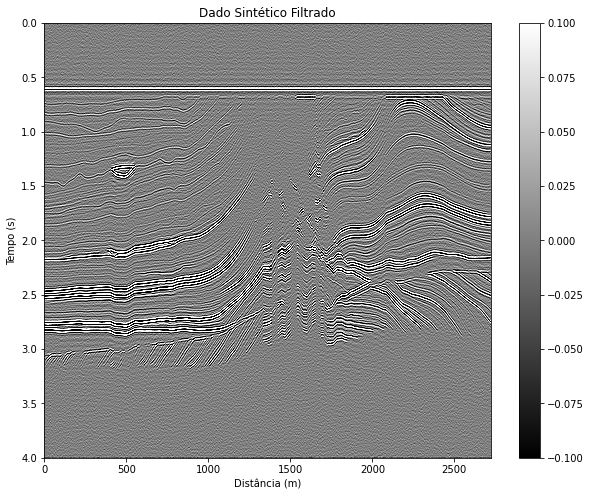

In [25]:
plt.figure(figsize=(10,8))
plt.imshow(M_noise.T, aspect="auto", interpolation="sinc", clim=(-0.1,0.1), cmap="gray", extent=[0,ntr*dx,nz*dt,0])
plt.title("Dado Sintético Ruidoso")
plt.xlabel("Distância (m)")
plt.ylabel("Tempo (s)")
plt.colorbar()
plt.show()

plt.figure(figsize=(10,8))
plt.imshow(M_filtered.T, aspect="auto", interpolation="sinc", clim=(-0.1,0.1), cmap="gray", extent=[0,ntr*dx,nz*dt,0])
plt.title("Dado Sintético Filtrado")
plt.xlabel("Distância (m)")
plt.ylabel("Tempo (s)")
plt.colorbar()
plt.show()

## Dado de Sismologia

In [26]:
from obspy import UTCDateTime
from obspy.clients.fdsn.header import URL_MAPPINGS
from obspy.clients.fdsn import Client
client = Client("IRIS")

               network: IU
               station: RCBR
              location: 00
               channel: BHZ
             starttime: 2020-09-18T21:33:58.019538Z
               endtime: 2020-09-18T22:53:57.969538Z
         sampling_rate: 20.0
                 delta: 0.05
                  npts: 96000
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 386, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 197632})
            processing: ['ObsPy 1.4.0: trim(endtime=UTCDateTime(2020, 9, 18, 22, 53, 58, 19538)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2020, 9, 18, 21, 33, 58, 19538))']


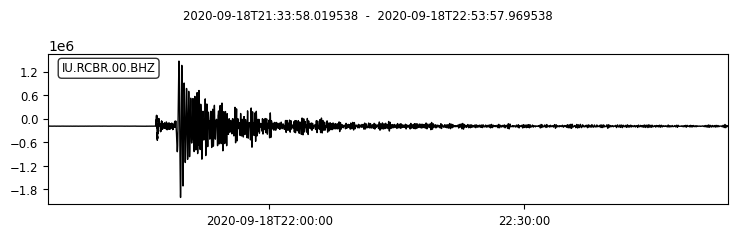

In [27]:
network = "IU"
station = "RCBR"
location = "00"
channel = "BHZ"

s_time = UTCDateTime("2020-09-18T21:33:58")
e_time = UTCDateTime("2020-09-18T22:53:58")

wf = client.get_waveforms(network, station, location, channel, s_time, e_time)
tr = wf[0]
print(tr.stats)
fig = tr.plot()

A biblioteca ``obspy`` possui funções próprias que aplicam filtros no dado

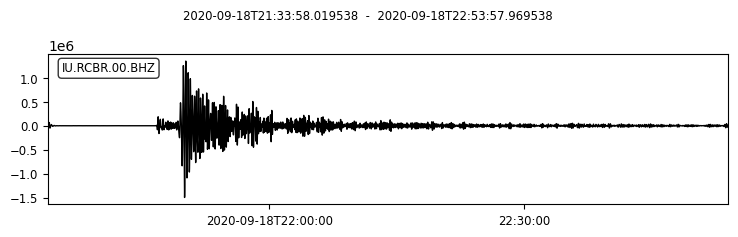

In [28]:
ftr = tr.copy()

ftr.filter(type="bandpass", freqmin = 0.05, freqmax = 0.15)
fig = ftr.plot()

Devemos sempre analisar o conteúdo de frequências do nosso sinal antes de aplicar um filtro, pois podemos perder informações importantes do nosso dado.

/usr/local/lib/python3.8/dist-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (30) of bandpass is at or above Nyquist (10.0). Applying a high-pass instead.
  warnings.warn(msg)


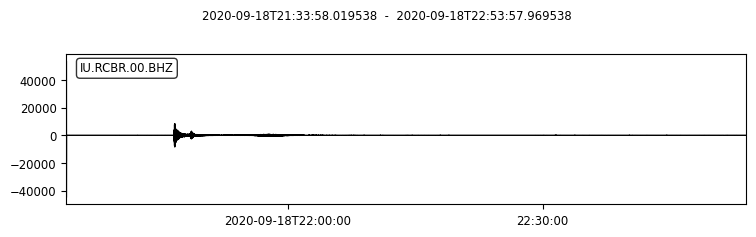

In [29]:
ftr = tr.copy()

ftr.filter(type="bandpass", freqmin = 5, freqmax = 30)
fig = ftr.plot()

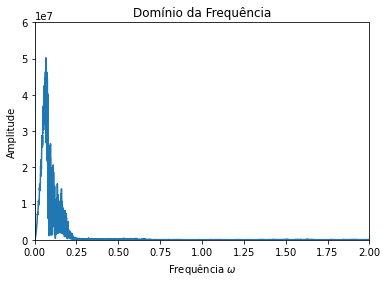

In [35]:
dado = tr.data 
N = tr.stats.npts
dt = tr.stats.delta
fs = tr.stats.sampling_rate

sis_freq=rfft(dado)
freq=rfftfreq(N,dt)

plt.plot(freq,abs(sis_freq)*dt)
plt.title("Domínio da Frequência")
plt.xlabel("Frequência $\omega$")
plt.ylabel("Amplitude")
plt.xlim(0,2)
plt.ylim(0,0.6e8)
plt.show()

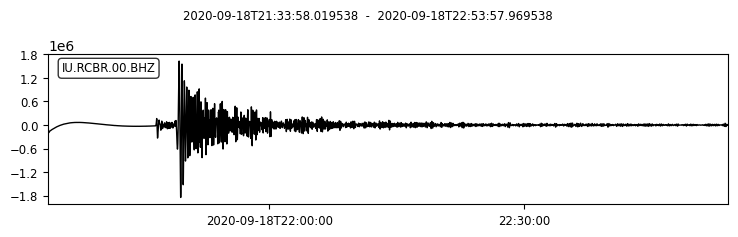

In [31]:
ftr = tr.copy()

a = 0.001
b = 0.3

ftr.filter(type="bandpass", freqmin = a, freqmax = b)
fig = ftr.plot()